Dataset:

* n_samples=200: The dataset will contain 200 samples.
* noise=0.1: Gaussian noise with a standard deviation of 0.1 is added to the data points, making the dataset more realistic and challenging by introducing some overlap between the classes.

Real-world Use Case:

* This type of dataset can be used to simulate scenarios where two classes are not perfectly separable, such as in medical diagnosis (e.g., distinguishing between benign and malignant tumors) or in finance (e.g., predicting whether a transaction is fraudulent or not). The added noise represents the uncertainty and variability present in real-world data.

Accuracy: 0.95


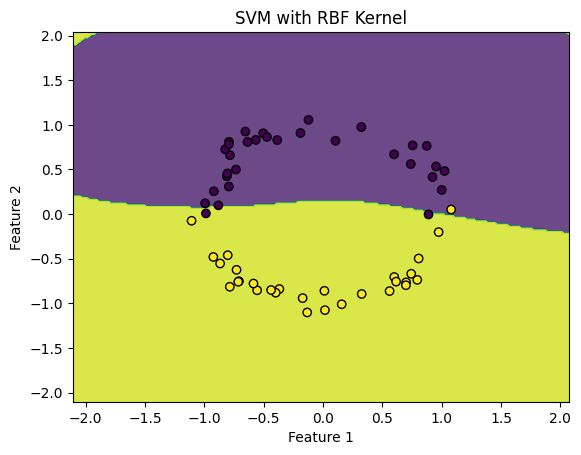

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 1: Generate circular data
def generate_circle_data(n_samples, noise=0.1):
    np.random.seed(0)
    angles = np.linspace(0, 2 * np.pi, n_samples)
    x_circle = np.cos(angles) + noise * np.random.randn(n_samples)
    y_circle = np.sin(angles) + noise * np.random.randn(n_samples)
    X = np.vstack((x_circle, y_circle)).T
    y = np.hstack((np.zeros(n_samples // 2), np.ones(n_samples // 2)))
    return X, y

# Generate data
X, y = generate_circle_data(200)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train an SVM with an RBF kernel
svm_rbf = SVC(kernel='rbf', gamma='scale')
svm_rbf.fit(X_train, y_train)

# Step 4: Evaluate the model on the testing data
y_pred = svm_rbf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Step 5: Visualize the results
def plot_decision_boundary(model, X, y):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM with RBF Kernel')
    plt.show()

plot_decision_boundary(svm_rbf, X_test, y_test)

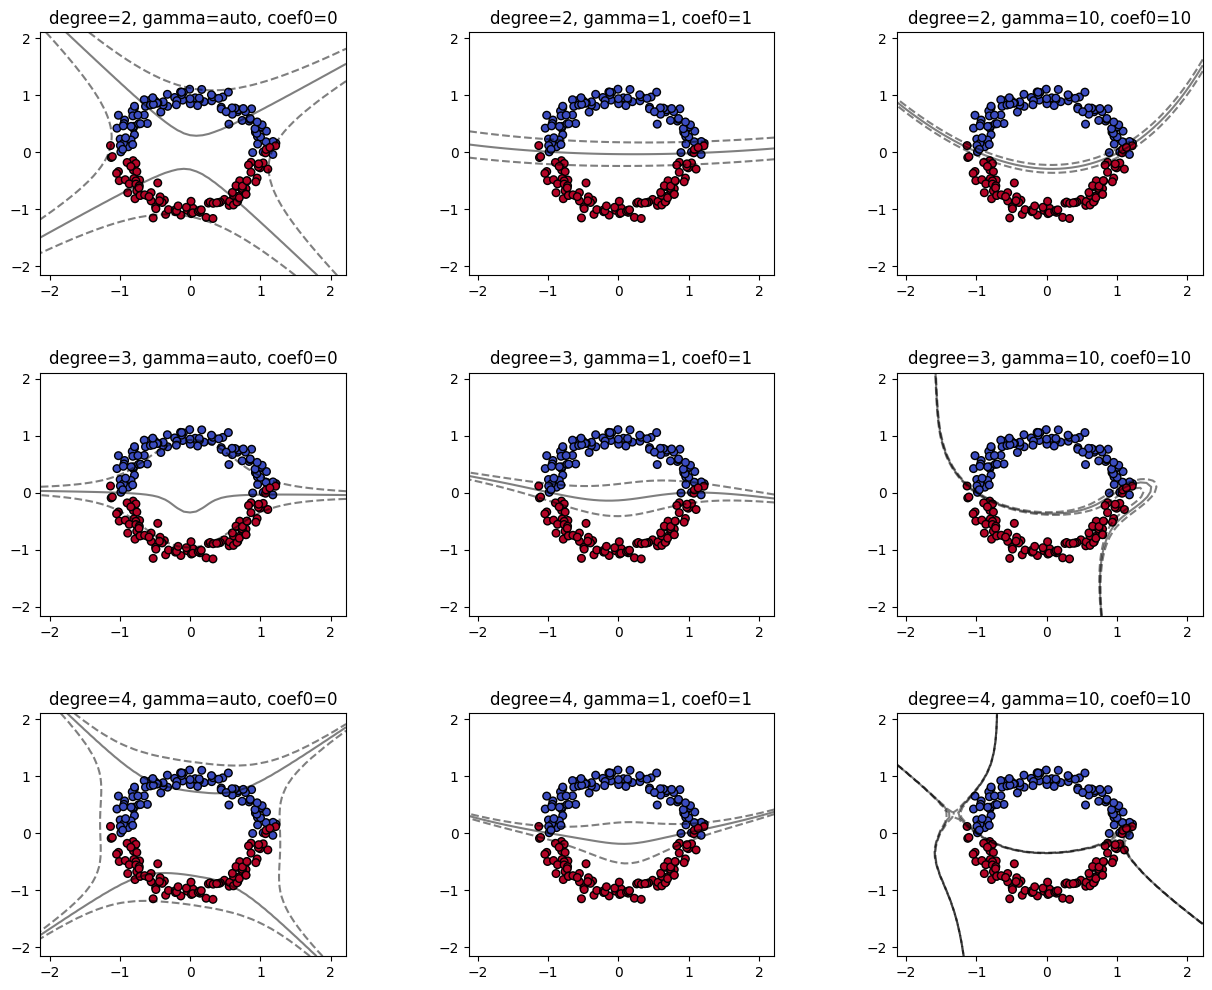

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC

# Generate synthetic dataset with overlapping data points
# X, y = make_circles(n_samples=100, factor=0.5, noise=0.1, random_state=42)

def generate_circle_data(n_samples, noise=0.1):
    np.random.seed(0)
    angles = np.linspace(0, 2 * np.pi, n_samples)
    x_circle = np.cos(angles) + noise * np.random.randn(n_samples)
    y_circle = np.sin(angles) + noise * np.random.randn(n_samples)
    X = np.vstack((x_circle, y_circle)).T
    y = np.hstack((np.zeros(n_samples // 2), np.ones(n_samples // 2)))
    return X, y

# Generate data
X, y = generate_circle_data(200)

# Define a function to plot decision boundaries
def plot_decision_boundary(model, X, y, ax):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plot decision boundary and margins
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # Plot the dataset points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')

# Set different values of degree, gamma, and coef0
degrees = [2, 3, 4]
gamma_values = ['auto', 1, 10]
coef0_values = [0, 1, 10]

fig, axes = plt.subplots(len(degrees), len(gamma_values), figsize=(15, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

C_value = 1  # Keeping C constant to focus on the polynomial kernel's parameters

# Iterate over different parameter combinations
for i, degree in enumerate(degrees):
    for j, gamma in enumerate(gamma_values):
        model = SVC(kernel='poly', degree=degree, gamma=gamma, coef0=coef0_values[j], C=C_value)
        model.fit(X, y)
        axes[i, j].set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
        axes[i, j].set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
        plot_decision_boundary(model, X, y, ax=axes[i, j])
        axes[i, j].set_title(f"degree={degree}, gamma={gamma}, coef0={coef0_values[j]}")

plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define the parameter grid for 'C', 'gamma', and 'degree' for the polynomial kernel
param_grid_poly = {
    'C': [0.01, 0.1, 1, 10],
    'gamma': [0.01, 0.1, 1, 10],
    'degree': [2, 3, 4],
    'kernel': ['poly']
}

# Initialize the GridSearchCV with SVM and parameter grid for polynomial kernel
grid_poly = GridSearchCV(SVC(), param_grid_poly, refit=True, verbose=2)
grid_poly.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print(f"Best Parameters (Poly Kernel): {grid_poly.best_params_}")
print(f"Best Cross-validation Score (Poly Kernel): {grid_poly.best_score_}")

# Test the best model on the test set
y_pred_poly = grid_poly.predict(X_test)
print(f"Test Set Accuracy (Poly Kernel): {accuracy_score(y_test, y_pred_poly)}")
print(classification_report(y_test, y_pred_poly))

# Print the confusion matrix
print('Confusion Matrix (Poly Kernel):')
print(confusion_matrix(y_test, y_pred_poly))

# Plot decision boundaries for the polynomial kernel
plot_decision_boundary(grid_poly.best_estimator_, X_test, y_test)
plt.title('SVM with Polynomial Kernel')
plt.show()


* Low degree, low gamma, low coef0: The model will have a simple decision boundary, suitable for datasets with simple relationships.
* High degree, high gamma, high coef0: The model will have a very complex decision boundary, suitable for datasets with intricate relationships but may risk overfitting.
* Low degree, high gamma, low coef0: The model will have a moderately complex decision boundary, balancing between fitting the data closely and generalizing well.
* High degree, low gamma, high coef0: The model will have a complex decision boundary but will be influenced more by the lower-degree terms, potentially leading to better generalization

---

RBF kernel

---

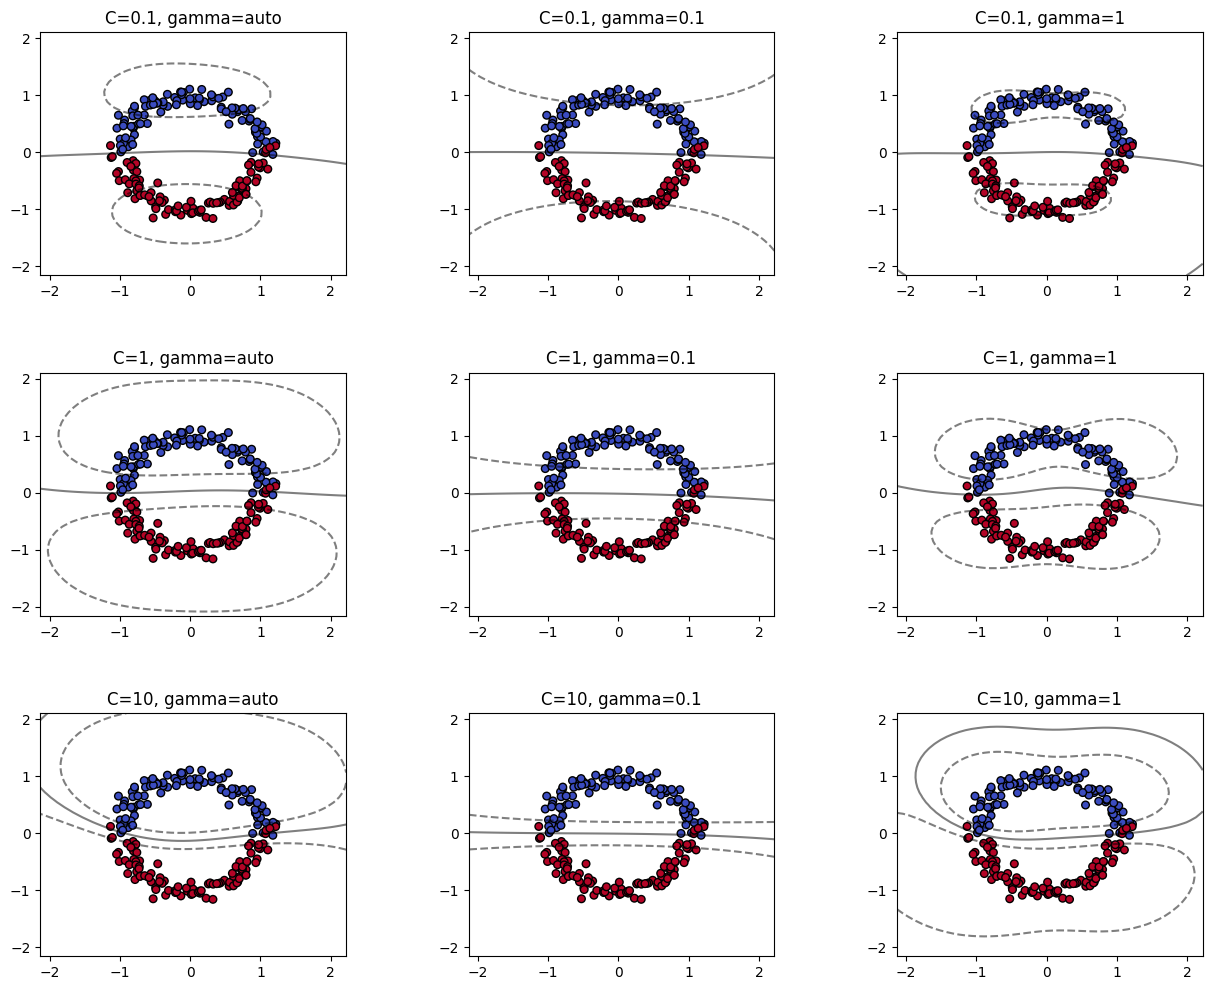

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC

# Generate synthetic dataset with overlapping data points
def generate_circle_data(n_samples, noise=0.1):
    np.random.seed(0)
    angles = np.linspace(0, 2 * np.pi, n_samples)
    x_circle = np.cos(angles) + noise * np.random.randn(n_samples)
    y_circle = np.sin(angles) + noise * np.random.randn(n_samples)
    X = np.vstack((x_circle, y_circle)).T
    y = np.hstack((np.zeros(n_samples // 2), np.ones(n_samples // 2)))
    return X, y

# Generate data
X, y = generate_circle_data(200)

# Define a function to plot decision boundaries
def plot_decision_boundary(model, X, y, ax):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plot decision boundary and margins
    ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # Plot the dataset points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')

# Set different values of C and gamma
C_values = [0.1, 1, 10]
gamma_values = ['auto', 0.1, 1]

fig, axes = plt.subplots(len(C_values), len(gamma_values), figsize=(15, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Iterate over different parameter combinations
for i, C in enumerate(C_values):
    for j, gamma in enumerate(gamma_values):
        model = SVC(kernel='rbf', C=C, gamma=gamma)
        model.fit(X, y)
        axes[i, j].set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
        axes[i, j].set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
        plot_decision_boundary(model, X, y, ax=axes[i, j])
        axes[i, j].set_title(f"C={C}, gamma={gamma}")

plt.show()

* High C and High gamma: The model will have a very complex decision boundary, fitting the training data very closely. This can lead to overfitting.
* High C and Low gamma: The model will still try to fit the training data closely, but the decision boundary will be smoother.
* Low C and High gamma: The model will have a complex decision boundary but will allow some misclassifications in the training data.
* Low C and Low gamma: The model will have a smooth decision boundary and will allow more misclassifications in the training data, potentially leading to better generalization.